<a href="https://colab.research.google.com/github/mentesniker/GeneticAlgoritmhs/blob/master/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generar una grafica aleatoria o introducir tu propia grafica?(Seleccionar 0 o 1 segun sea el caso)0
Ejecutando algoritmo genetico.......
[[0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1], [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], [1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0], [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0], [1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1], [1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 

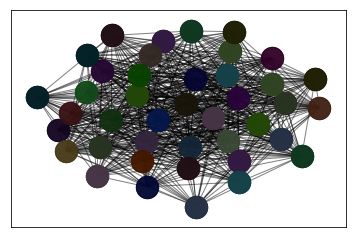

In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt
import networkx as nx
import random

#Class graph coloring, implementacion basada en el articulo
#de Musa M. Hindi and Roman V.Yampolskiy para colorear graficas
#Con una ligera variacion al momento de calcular el fitnes de un chromosoma
class GraphColoring():
	#El constructor de la clase recibe graph, que es la grafica
	#dada como matriz de adyacencias, e inicilaiza las variables
	#de poblacion y de fitnes que es la poblacion y su medida de que tan bueno
	#es el individuo
	#Las coloraciones se representaran como una arreglo unidimensonal
	#donde la primera entrada corresponde al nodo uno, la segunda al segundo...
	def __init__(self,graph):
		self.graph = graph
		self.population = self.firstPopulation(len(graph))
		self.fitests = self.CalculateFitest()
	#Metodo que genera una poblacion de chromosomas aleatoria
	#Recibe el parametro numero de chromosomas que es el numero 
	#de nodos que queremos	
	def firstPopulation(self,numberChromosomes):
		aux = list()
		for i in range(0,50):
			aux2 = list()
			for j in range(0,numberChromosomes):
				aux2.append(np.random.randint(numberChromosomes))
			aux.append(aux2)
		return aux
	#Funcion para calcular la aptitud de todos los individuos
	#Se regresara un arreglo con las aptitudes de la poblacion
	def CalculateFitest(self):
		color = -1
		aux = list()
		intersections = 0
		ColorsUsed = set()
		for e in range(0,len(self.population)):
						for i in range(0,len(self.population[e])):
								color = self.population[e][i]
								adyacentCV = self.getColorAdyacent(i,self.population[e])
								for j in adyacentCV:
									ColorsUsed.add(j)
								for colorAd in adyacentCV:
										if colorAd == color:
												intersections += 1
						aux.append(intersections)
						intersections = 0
		return aux
	#Auxiliary function for search the color of adyacent vertix given
	#a certain vertix index
	def getColorAdyacent(self,index,chromosome):
		adyacentInd = list()
		for j in range(1,len(self.graph)):
			if(self.graph[index][j] == 1):
				adyacentInd.append(j)
		adyacentCol = list()
		for j in adyacentInd:
			adyacentCol.append(chromosome[j])
		return adyacentCol
	#Funcion para recombinar la informacion de los padres
	#Implementada segun el pseudocodigo del articulo
	def crossover(self,P1,P2):
		point = np.random.randint(len(P1)-1) + 1
		aux1 = P1[0:point]
		aux2 = P2[point:]
		child = list()
		for i in range(0,len(aux1)):
			child.append(aux1[i])
		for i in range(0,len(aux2)):
			child.append(aux2[i])
		return child
	#Funcion para seleccionar los padres
	#Implementada segun el pseudocodigo del articulo
	def parentSelection1(self):
		parents = list()
		auxp1 = np.random.randint(len(self.population))
		auxp2 = np.random.randint(len(self.population))
		if(self.population[auxp1] < self.population[auxp2]):
			parents.append(self.population[auxp1])
		else:
			parents.append(self.population[auxp2])
		auxp1 = np.random.randint(len(self.population))
		auxp2 = np.random.randint(len(self.population))
		if(self.population[auxp1] < self.population[auxp2]):
			parents.append(self.population[auxp1])
		else:
			parents.append(self.population[auxp2])
		return parents
	#Funcion para seleccionar los padres
	#Implementada segun el pseudocodigo del articulo
	def parentSelection2(self):
		fitter = - 1
		for i in range(0,len(self.population)):
			for j in range(i+1,len(self.population)):
				if(self.fitests[i] < self.fitests[j]):
					fitter = i
		return[self.population[fitter],self.population[fitter]] 
	#Funcion que nos regresa el indice del mejor individuo de la
	#poblacion
	def getFitterIndex(self):
		fitter = - 1
		for i in range(0,len(self.population)):
			for j in range(i+1,len(self.population)):
				if(self.fitests[i] < self.fitests[j]):
					fitter = i
		return fitter
	#Funcion para mutar a un individuo
	#Implementada segun el pseudocodigo del articulo
	def mutation2(self,chromosome):
		for i in range(0,len(chromosome)):
			color = chromosome[i]
			adyacentCV = self.getColorAdyacent(i,chromosome)
			for colorAd in adyacentCV:
				if(colorAd == color):
					chromosome[i] = np.random.randint(len(self.graph))
		return chromosome
	#Funcion para mutar a un individuo
	#Implementada segun el pseudocodigo del articulo
	def mutation1(self,chromosome):
		for i in range(0,len(chromosome)):
			color = chromosome[i]
			adyacentCV = self.getColorAdyacent(i,chromosome)
			for colorAd in adyacentCV:
				if(colorAd == color):
					allColors = self.getAllColors()
					validColors = list(allColors - set(adyacentCV))
					chromosome[i] = validColors[np.random.randint(len(validColors))]
		return chromosome

	#Funcion auxiliar para obtener el maximo numero de colores
	#que pueden ser usados en la grafica
	def getAllColors(self):
		aux = set()
		for e in range(0,len(self.graph)):
			aux.add(e)
		return aux

	#Algoritmo genetico, implementado segun 
	#el articulo
	def geneticAlgorithm(self):
		i = 0
		while i < 100:
			NewPopulation = list()
			BestInd = self.getFitterIndex()
			if self.fitests[BestInd] == 0:
				break
			NewPopulation.append(self.population[BestInd])
			while len(NewPopulation) < 50:
				father1 = -1
				father2 = -1
				if self.fitests[BestInd] > 4:	
					father1,father2 = self.parentSelection1()
				else:
					father1,father2 = self.parentSelection2()
				child = self.crossover(father1,father2)
				if self.fitests[BestInd] > 4:	
					child = self.mutation1(child)
				else:
					child = self.mutation2(child)
				NewPopulation.append(child)
			self.population = NewPopulation
			self.fitests = self.CalculateFitest()
			i += 1

def graficaAleatoria():
  numNodos = np.random.randint(50)
  grafica = list()
  for i in range(0,numNodos):
	  aux = list()
	  for j in range(0,numNodos):
		  aux.append(np.random.randint(2))
	  grafica.append(aux)
  return grafica
      
#Pedimos el input para el algoritmo
GraficaAleatoria = int(input('Generar una grafica aleatoria o introducir tu propia grafica?(Seleccionar 0 o 1 segun sea el caso)'))
grafica = list()
if(GraficaAleatoria == 0):
  grafica = graficaAleatoria()
else:
  numNodos = int(input('Dame el numero de nodos'))
  for i in range(0,numNodos):
	  aux = list()
	  print('El nodo ' + str(i) + ',Con quien esta conectado?')
	  print('Ingresa la opcion con un 0 si no esta conectado o un 1 si esta conectado')
	  for j in range(0,numNodos):
		  aux.append(int(input('Esta conectado con el nodo ' + str(j))))
	  grafica.append(aux)
#Ejecutamos el algoritmo genetico
print('Ejecutando algoritmo genetico.......')
grafica1 = GraphColoring(grafica)
grafica1.geneticAlgorithm()
BestInd = grafica1.getFitterIndex()
#Creamos una grafica para la biblioteca networkx
G = nx.Graph()
for i in range(0,len(grafica)):
  G.add_node(i)
aristas = list()
for e in range(0,len(grafica)):
  for i in range(0,len(grafica)):
    if grafica[e][i] == 1:
      aristas.append([e,i])
G.add_edges_from(aristas)
#Creamos una lista con 1 color distinto por cada nodo de la grafica
#Los colores se crean en hexadecimal
pos=nx.spring_layout(G)
colores = list()
aux = random.sample(range(50), len(grafica))
aux1 = random.sample(range(50), len(grafica))
aux2 = random.sample(range(50), len(grafica))
coloresAux = [[x, y, z] for x, y,z in zip(aux, aux1,aux2)]
colores = list()
for e in coloresAux:
  cadena = "#"
  for i in e:
    if i < 10:
      cadena += "0" + str(i)
    else:
      cadena += str(i)
  colores.append(cadena)
#Coloreamos los nodos de la grafica
for i in range(0,len(grafica1.population[BestInd])):
  for j in range(i,len(grafica1.population[BestInd])):
    if grafica1.population[BestInd][i] == grafica1.population[BestInd][j]:
      nx.draw_networkx_nodes(G,pos,
                       nodelist=[i,j],
                       node_color= colores[grafica1.population[BestInd][i]],
                       node_size=500,
                   alpha=0.8)
#Imprimimos la grafica
print(grafica)
print("Los colores utilizados fueron: " + str(grafica1.population[BestInd]))
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
plt.draw()